<a href="https://colab.research.google.com/github/luizfernandopezzi/AvantiStore/blob/master/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

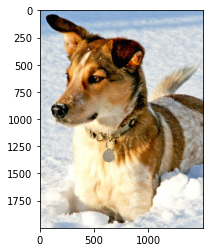

In [ ]:
B = imread('/content/dog.jpg')
Y = np.mean(B,-1); # Convert RGB to grayscale

imgB = plt.imshow(B)
plt.show()

In [ ]:
np.shape(B)

(2000, 1500, 3)

In [ ]:
np.shape(Y)

(2000, 1500)

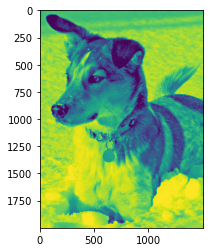

In [ ]:
imgY = plt.imshow(Y)
#imgY.set_cmap('gray')
plt.show()

In [ ]:
U, S, VT = np.linalg.svd(Y,full_matrices=True)
Uhat, Shat, Vhat = np.linalg.svd(Y, full_matrices=False)
S = np.diag(S)
Shat = np.diag(Shat)

In [ ]:
np.shape(U)

(2000, 2000)

In [ ]:
np.shape(S)

(1500, 1500)

In [ ]:
S

array([[2.97619391e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.13288052e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.79235274e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.86742144e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.70635876e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.64139913e+00]])

In [ ]:
np.shape(VT)

(1500, 1500)

In [ ]:
np.shape(Uhat)

(2000, 1500)

In [ ]:
np.shape(Shat)

(1500, 1500)

In [ ]:
Shat

array([[2.97619391e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.13288052e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.79235274e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.86742144e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.70635876e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.64139913e+00]])

In [ ]:
j = 0
for r in (1, 2, 5):
    # Construct approximate image
    Uapprox = U[:,:r]
    Sapprox = S[0:r,:r]
    VTapprox = VT[:r,:]
    Xapprox = Uapprox @ Sapprox @ VTapprox
    print(np.shape(Uapprox), np.shape(Sapprox), np.shape(VTapprox))

(2000, 1) (1, 1) (1, 1500)
(2000, 2) (2, 2) (2, 1500)
(2000, 5) (5, 5) (5, 1500)


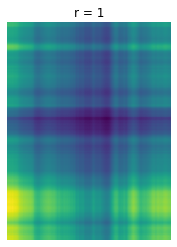

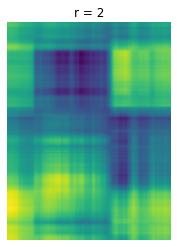

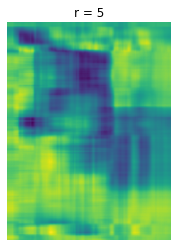

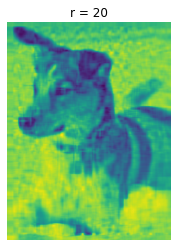

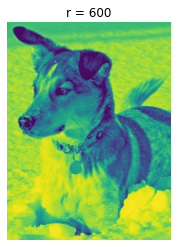

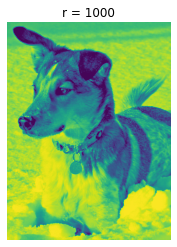

In [ ]:
j = 0
for r in (1, 2, 5, 20, 600, 1000):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

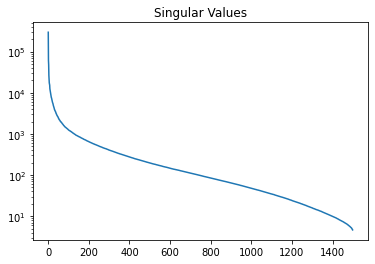

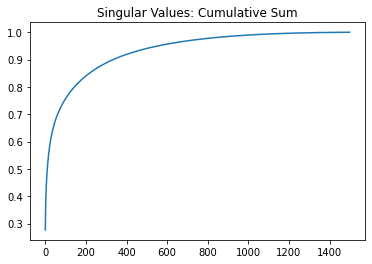

In [ ]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()